# Draw domain and Obstacle with Widgets

In [134]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
from matplotlib import pyplot as  plt
import pandas as pd

%matplotlib notebook
class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()
        
def PlotCanvas(base,height,x0):
    #Fix x size to jupyter column width
    canvas = plt.figure(num=1,figsize=(base+1,height+1))
    ax = canvas.add_subplot(111)
    line, = ax.plot([x0], [0.0])  # empty line
    ax.set_xlim([0,base])
    ax.set_ylim([0,height])
    ax.set_aspect('equal')
    linebuilder = LineBuilder(line)
    xvalues = line.get_xdata()
    yvalues = line.get_ydata()
    plt.title('Draw obstacle, origin at ('+str(x0)+',0.0)'+', Don\'t need to close the perimeter')
    return line

w=interactive(PlotCanvas, 
                            base=FloatSlider(min=0, max=10, step=1, continuous_update=False,value=7),
                            height=FloatSlider(min=0.1, max=3, step=0.1, continuous_update=False,value=1.0),
                            x0=FloatSlider(min=0.0, max=10, step=0.1, continuous_update=False,value=4.0))
from IPython.display import display
display(w)
line=w.result

button = widgets.Button(description="Finish Obstacle")


display(button)

def on_button_clicked(b):
    # Obtain values and close last line
    xval=line.get_xdata()+[line.get_xdata()[-1]]
    yval=line.get_ydata()+[0.0]
    canvas=plt.figure(1)
    ax=canvas.axes[0]
    ax.plot(xval,yval)
    df =  pd.DataFrame(
    {'x': xval,
     'y': yval,
    })
    print(df)

button.on_click(on_button_clicked)

          x         y
0  4.000000  0.000000
1  4.163024  0.377782
2  4.535605  0.422944
3  4.896895  0.287460
4  4.930766  0.084234
5  4.930766  0.000000


In [135]:
    xval=line.get_xdata()+[line.get_xdata()[-1]]
    yval=line.get_ydata()+[0.0]
    df =  pd.DataFrame(
    {'x': xval,
     'y': yval,
    })
    df

,x,y
0,4.000000,0.000000
1,4.163024,0.377782
2,4.535605,0.422944
3,4.896895,0.287460
4,4.930766,0.084234
5,4.930766,0.000000


# Draw domain using points

In [2]:
import numpy as np
from math import sqrt
from proteus import Domain
domain = Domain.PlanarStraightLineGraphDomain(vertices=[[0.0,0.0],[0.0,1.0],[1.0,0.0]],segments=[[0,1],[1,2],[2,0]])


In [29]:
#domain.writePLY("myDomain")
#domain.writePoly("myDomain")

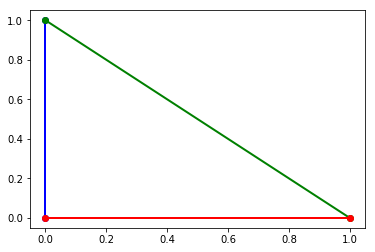

In [28]:

colors = ['b','g','r','c','m','y','k','w']
for si,s in enumerate(domain.segments):
            plt.plot([domain.vertices[s[0]][0],
                     domain.vertices[s[1]][0]],
                    [domain.vertices[s[0]][1],
                     domain.vertices[s[1]][1]],
                    color=colors[domain.segmentFlags[si]],
                    linewidth=2,
                    marker='o')
plt.show()